Клиентам компании Мегалайн предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, надо понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. Первым делом загрузим данные.

# Project_1._Testing_Statistical_Hypotheses

# Знакомство с данными

In [130]:
import pandas as pd
calls = pd.read_csv('/datasets/calls.csv')
calls.info()
calls.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [131]:
internet = pd.read_csv('/datasets/internet.csv')
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [132]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [133]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [134]:
users = pd.read_csv('/datasets/users.csv')
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Далее нам предстоит этап предобработки данных. Добавим в столбец звонков месяц и сгруппируем таблицу по столбцам month и user_id

# Предобработка данных

In [135]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [136]:
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [137]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [138]:
users['month'] = users['reg_date'].dt.month
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [139]:
import numpy as np
x = calls['duration']
calls['duration'] = np.ceil(x)
calls.info()
calls.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [140]:
calls_df = calls.pivot_table(index = ['month', 'user_id'], values = 'duration', aggfunc =['count', 'sum']).reset_index()
calls_df.head()

,month,user_id,count,sum
,,,duration,duration
0,1,1005,15,95.0
1,1,1032,61,380.0
2,1,1045,1,9.0
3,1,1055,64,551.0
4,1,1071,24,194.0


Убираем "двухэтажные" названия столбцов

In [141]:
calls_df.columns=['month','user_id','call_count', 'call_sum']
calls_df.head()

,month,user_id,call_count,call_sum
0,1,1005,15,95.0
1,1,1032,61,380.0
2,1,1045,1,9.0
3,1,1055,64,551.0
4,1,1071,24,194.0


Аналогичную операцию проведем с другими столбцами 

In [142]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [143]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


In [144]:
internet_df = internet.pivot_table(index = ['month', 'user_id'], values = 'mb_used', aggfunc =['count', 'sum']).reset_index()
internet_df.head()

,month,user_id,count,sum
,,,mb_used,mb_used
0,1,1005,6,2727.97
1,1,1032,62,24127.69
2,1,1045,5,2346.71
3,1,1055,47,17090.88
4,1,1071,40,15604.34


In [145]:
internet_df.columns=['month','user_id','inet_count', 'inet_sum']
internet_df.head()

,month,user_id,inet_count,inet_sum
0,1,1005,6,2727.97
1,1,1032,62,24127.69
2,1,1045,5,2346.71
3,1,1055,47,17090.88
4,1,1071,40,15604.34


In [146]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [147]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [148]:
messages_df = messages.pivot_table(index = ['month', 'user_id'], values = 'id', aggfunc =['count']).reset_index()
messages_df.info()
messages_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   (month, )    2717 non-null   int64
 1   (user_id, )  2717 non-null   int64
 2   (count, id)  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


,month,user_id,count
,,,id
0,1,1005,7
1,1,1032,38
2,1,1045,5
3,1,1055,30
4,1,1071,16


In [149]:
messages_df.columns=['month','user_id','messages']
messages_df.head()

,month,user_id,messages
0,1,1005,7
1,1,1032,38
2,1,1045,5
3,1,1055,30
4,1,1071,16


Соединим таблицы. По столбцу id соединим таблицы звонков, интернета и сообщений.

In [150]:
calls_internet = calls_df.merge(internet_df, on = ['user_id', 'month'])
calls_internet.info()
calls_internet.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3163 entries, 0 to 3162
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       3163 non-null   int64  
 1   user_id     3163 non-null   int64  
 2   call_count  3163 non-null   int64  
 3   call_sum    3163 non-null   float64
 4   inet_count  3163 non-null   int64  
 5   inet_sum    3163 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 173.0 KB


,month,user_id,call_count,call_sum,inet_count,inet_sum
0,1,1005,15,95.0,6,2727.97
1,1,1032,61,380.0,62,24127.69
2,1,1045,1,9.0,5,2346.71
3,1,1055,64,551.0,47,17090.88
4,1,1071,24,194.0,40,15604.34


In [151]:
calls_internet_messages = calls_internet.merge(messages_df, on = ['user_id', 'month'])
calls_internet_messages.info()
calls_internet_messages.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667 entries, 0 to 2666
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       2667 non-null   int64  
 1   user_id     2667 non-null   int64  
 2   call_count  2667 non-null   int64  
 3   call_sum    2667 non-null   float64
 4   inet_count  2667 non-null   int64  
 5   inet_sum    2667 non-null   float64
 6   messages    2667 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 166.7 KB


,month,user_id,call_count,call_sum,inet_count,inet_sum,messages
0,1,1005,15,95.0,6,2727.97,7
1,1,1032,61,380.0,62,24127.69,38
2,1,1045,1,9.0,5,2346.71,5
3,1,1055,64,551.0,47,17090.88,30
4,1,1071,24,194.0,40,15604.34,16


Присоединяем таблицу пользователей по столбцам user_id и month

In [152]:
cim = calls_internet_messages
cim_users = cim.merge(users, on = ['user_id', 'month'])
cim_users.info()
cim_users.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 402
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month       403 non-null    int64         
 1   user_id     403 non-null    int64         
 2   call_count  403 non-null    int64         
 3   call_sum    403 non-null    float64       
 4   inet_count  403 non-null    int64         
 5   inet_sum    403 non-null    float64       
 6   messages    403 non-null    int64         
 7   age         403 non-null    int64         
 8   churn_date  27 non-null     object        
 9   city        403 non-null    object        
 10  first_name  403 non-null    object        
 11  last_name   403 non-null    object        
 12  reg_date    403 non-null    datetime64[ns]
 13  tariff      403 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 47.2+ KB


,month,user_id,call_count,call_sum,inet_count,inet_sum,messages,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1,1005,15,95.0,6,2727.97,7,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
1,1,1032,61,380.0,62,24127.69,38,31,NaN,Ульяновск,Инна,Игнатьева,2018-01-04,smart
2,1,1045,1,9.0,5,2346.71,5,48,NaN,Улан-Удэ,Джемма,Карасева,2018-01-30,smart
3,1,1055,64,551.0,47,17090.88,30,39,NaN,Казань,Луиза,Березина,2018-01-02,smart
4,1,1071,24,194.0,40,15604.34,16,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart


Далее присоединяем таблицу тарифов по стобцу тарифа, который уже есть в общей таблице

In [153]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'}) 
tariffs.head() 

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [154]:
cim_users_tariffs = cim_users.merge(tariffs, on = 'tariff')
cim_users_tariffs.info()
cim_users_tariffs.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 402
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  403 non-null    int64         
 1   user_id                403 non-null    int64         
 2   call_count             403 non-null    int64         
 3   call_sum               403 non-null    float64       
 4   inet_count             403 non-null    int64         
 5   inet_sum               403 non-null    float64       
 6   messages               403 non-null    int64         
 7   age                    403 non-null    int64         
 8   churn_date             27 non-null     object        
 9   city                   403 non-null    object        
 10  first_name             403 non-null    object        
 11  last_name              403 non-null    object        
 12  reg_date               403 non-null    datetime64[ns]
 13  tarif

,month,user_id,call_count,call_sum,inet_count,inet_sum,messages,age,churn_date,city,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1,1005,15,95.0,6,2727.97,7,67,NaN,Набережные Челны,...,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
1,1,1032,61,380.0,62,24127.69,38,31,NaN,Ульяновск,...,Игнатьева,2018-01-04,smart,50,15360,500,550,200,3,3
2,1,1045,1,9.0,5,2346.71,5,48,NaN,Улан-Удэ,...,Карасева,2018-01-30,smart,50,15360,500,550,200,3,3
3,1,1055,64,551.0,47,17090.88,30,39,NaN,Казань,...,Березина,2018-01-02,smart,50,15360,500,550,200,3,3
4,1,1071,24,194.0,40,15604.34,16,20,2018-08-31,Омск,...,Чумаков,2018-01-09,smart,50,15360,500,550,200,3,3


Проверяем пропуски. 

In [155]:
df = cim_users_tariffs 
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 402
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  403 non-null    int64         
 1   user_id                403 non-null    int64         
 2   call_count             403 non-null    int64         
 3   call_sum               403 non-null    float64       
 4   inet_count             403 non-null    int64         
 5   inet_sum               403 non-null    float64       
 6   messages               403 non-null    int64         
 7   age                    403 non-null    int64         
 8   churn_date             27 non-null     object        
 9   city                   403 non-null    object        
 10  first_name             403 non-null    object        
 11  last_name              403 non-null    object        
 12  reg_date               403 non-null    datetime64[ns]
 13  tarif

month                      0
user_id                    0
call_count                 0
call_sum                   0
inet_count                 0
inet_sum                   0
messages                   0
age                        0
churn_date               376
city                       0
first_name                 0
last_name                  0
reg_date                   0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Пропуски в столбце churn_date естественны, большинство клиентов на момент выгрузки данных продолжает пользоваться тарифами. 
Пропусков в других строках нет. 

In [156]:
df.duplicated().sum()

0

Дубликатов нет. Двигаемся дальше. Приведем данные к нужным типам

In [157]:
df['inet_gb'] = df['inet_sum']/1024
df.head()

,month,user_id,call_count,call_sum,inet_count,inet_sum,messages,age,churn_date,city,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,inet_gb
0,1,1005,15,95.0,6,2727.97,7,67,NaN,Набережные Челны,...,2018-01-25,smart,50,15360,500,550,200,3,3,2.664033
1,1,1032,61,380.0,62,24127.69,38,31,NaN,Ульяновск,...,2018-01-04,smart,50,15360,500,550,200,3,3,23.562197
2,1,1045,1,9.0,5,2346.71,5,48,NaN,Улан-Удэ,...,2018-01-30,smart,50,15360,500,550,200,3,3,2.291709
3,1,1055,64,551.0,47,17090.88,30,39,NaN,Казань,...,2018-01-02,smart,50,15360,500,550,200,3,3,16.690313
4,1,1071,24,194.0,40,15604.34,16,20,2018-08-31,Омск,...,2018-01-09,smart,50,15360,500,550,200,3,3,15.238613


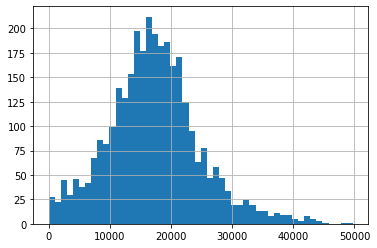

In [158]:
internet_df.head()
internet_df['inet_sum'].describe()
internet_df['inet_sum'].hist(bins = 50);
#internet_df['inet_gb'] = np.ceil(internet_df['inet_sum']/1024)
#internet_df.head(60)

# Анализ данных

Добавляем в столбец profit сумму, которую получит оператор от каждого клиента

In [159]:
def revenue(df):
    
    tariff = df['tariff']
    over_min = df['call_sum'] - tariffs.loc[tariffs['tariff'] == tariff,'minutes_included'].item()
    over_sms = df['messages'] - tariffs.loc[tariffs['tariff'] == tariff,'minutes_included'].item()
    over_gb = df['inet_sum'] - tariffs.loc[tariffs['tariff'] == tariff,'minutes_included'].item()

    if over_min < 0:
        rub_min = 0
    else:
        rub_min = over_min * df['rub_per_minute']

    if over_sms < 0:
        rub_sms = 0
    else:
        rub_sms = over_sms * df['rub_per_message']

    if over_gb < 0:
        rub_gb = 0
    else:
        rub_gb = np.ceil(over_gb / 1024) * df['rub_per_gb']

    revenue = rub_min+rub_sms+rub_gb+df['rub_monthly_fee']

    return revenue

df['profit'] = df.apply(revenue, axis=1)

In [160]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 402
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  403 non-null    int64         
 1   user_id                403 non-null    int64         
 2   call_count             403 non-null    int64         
 3   call_sum               403 non-null    float64       
 4   inet_count             403 non-null    int64         
 5   inet_sum               403 non-null    float64       
 6   messages               403 non-null    int64         
 7   age                    403 non-null    int64         
 8   churn_date             27 non-null     object        
 9   city                   403 non-null    object        
 10  first_name             403 non-null    object        
 11  last_name              403 non-null    object        
 12  reg_date               403 non-null    datetime64[ns]
 13  tarif

,month,user_id,call_count,call_sum,inet_count,inet_sum,messages,age,churn_date,city,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,inet_gb,profit
0,1,1005,15,95.0,6,2727.97,7,67,NaN,Набережные Челны,...,smart,50,15360,500,550,200,3,3,2.664033,1150.0
1,1,1032,61,380.0,62,24127.69,38,31,NaN,Ульяновск,...,smart,50,15360,500,550,200,3,3,23.562197,5350.0
2,1,1045,1,9.0,5,2346.71,5,48,NaN,Улан-Удэ,...,smart,50,15360,500,550,200,3,3,2.291709,950.0
3,1,1055,64,551.0,47,17090.88,30,39,NaN,Казань,...,smart,50,15360,500,550,200,3,3,16.690313,4103.0
4,1,1071,24,194.0,40,15604.34,16,20,2018-08-31,Омск,...,smart,50,15360,500,550,200,3,3,15.238613,3550.0


In [161]:
ultra = df[df['tariff'] == 'ultra']
ultra['profit'].describe()

count     113.000000
mean     3309.292035
std      1238.600677
min      1950.000000
25%      2250.000000
50%      3000.000000
75%      4050.000000
max      6750.000000
Name: profit, dtype: float64

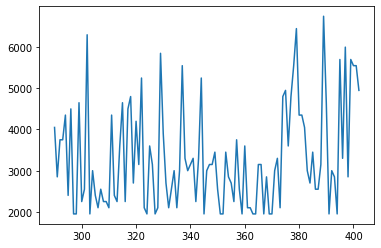

In [162]:
ultra['profit'].plot();

In [163]:
smart = df[df['tariff'] == 'smart']
smart['profit'].describe()

count     290.000000
mean     2486.344828
std      1134.780688
min       550.000000
25%      1550.000000
50%      2350.000000
75%      3150.000000
max      5550.000000
Name: profit, dtype: float64

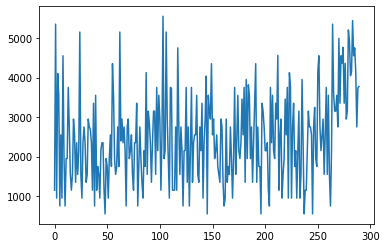

In [164]:
smart['profit'].plot();

In [165]:
smart['profit'].sum()

721040.0

In [166]:
ultra['profit'].sum()

373950.0

In [167]:
print('Данные для звонков тарифа смарт:')
print(smart['call_sum'].describe())
print()
print('Данные для интернета тарифа смарт:')
print(smart['inet_sum'].describe())
print()
print('Данные для сообщений тарифа смарт:')
print(smart['messages'].describe())

Данные для звонков тарифа смарт:
count    290.000000
mean     254.155172
std      159.056518
min        0.000000
25%      118.250000
50%      238.500000
75%      353.000000
max      705.000000
Name: call_sum, dtype: float64

Данные для интернета тарифа смарт:
count      290.000000
mean      9845.069793
std       5705.015319
min          0.000000
25%       5191.060000
50%       9241.670000
75%      13641.775000
max      25761.350000
Name: inet_sum, dtype: float64

Данные для сообщений тарифа смарт:
count    290.000000
mean      23.272414
std       20.742404
min        1.000000
25%        7.000000
50%       17.000000
75%       32.000000
max      103.000000
Name: messages, dtype: float64


In [168]:
print('Данные для звонков тарифа ультра:')
print(ultra['call_sum'].describe())
print()
print('Данные для интернета тарифа ультра:')
print(ultra['inet_sum'].describe())
print()
print('Данные для сообщений тарифа ультра:')
print(ultra['messages'].describe())

Данные для звонков тарифа ультра:
count     113.000000
mean      326.619469
std       266.340354
min         1.000000
25%       106.000000
50%       277.000000
75%       462.000000
max      1186.000000
Name: call_sum, dtype: float64

Данные для интернета тарифа ультра:
count      113.000000
mean     11734.918407
std       8525.562999
min          0.000000
25%       4677.840000
50%       9782.390000
75%      16681.400000
max      34888.140000
Name: inet_sum, dtype: float64

Данные для сообщений тарифа ультра:
count    113.000000
mean      40.469027
std       38.013877
min        1.000000
25%       14.000000
50%       27.000000
75%       62.000000
max      223.000000
Name: messages, dtype: float64


Рассмотрим на графиках время разговоров

count    290.000000
mean     254.155172
std      159.056518
min        0.000000
25%      118.250000
50%      238.500000
75%      353.000000
max      705.000000
Name: call_sum, dtype: float64


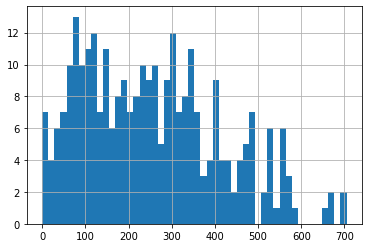

In [169]:
smart['call_sum'].hist(bins = 50);
print(smart['call_sum'].describe())

count     113.000000
mean      326.619469
std       266.340354
min         1.000000
25%       106.000000
50%       277.000000
75%       462.000000
max      1186.000000
Name: call_sum, dtype: float64


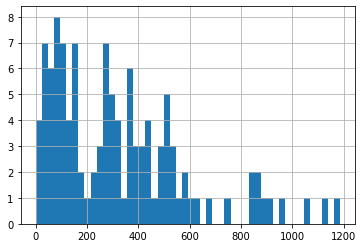

In [170]:
ultra['call_sum'].hist(bins = 50);
print(ultra['call_sum'].describe())

Рассмотрим на графиках объем трафика

count    290.000000
mean       9.614326
std        5.571304
min        0.000000
25%        5.069395
50%        9.025068
75%       13.322046
max       25.157568
Name: inet_gb, dtype: float64

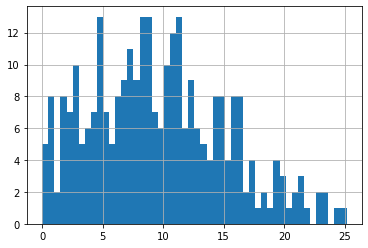

In [171]:
smart['inet_gb'].hist(bins = 50);
smart['inet_gb'].describe()

count    113.000000
mean      11.459881
std        8.325745
min        0.000000
25%        4.568203
50%        9.553115
75%       16.290430
max       34.070449
Name: inet_gb, dtype: float64

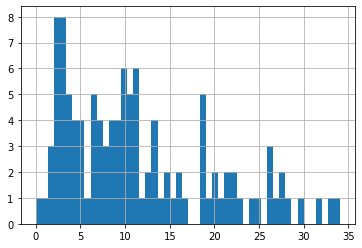

In [172]:
ultra['inet_gb'].hist(bins = 50);
ultra['inet_gb'].describe()

Рассмотрим на графиках данные об отправленных сообщениях

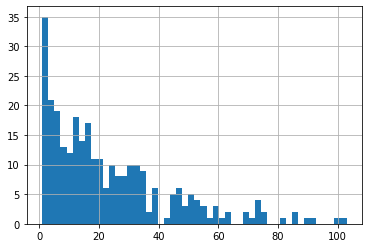

In [173]:
smart['messages'].describe()
smart['messages'].hist(bins = 50);

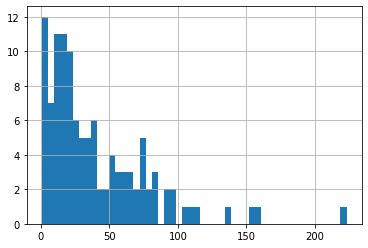

In [174]:
ultra['messages'].describe()
ultra['messages'].hist(bins = 50);

Мы рассмотрели данные, и можем сделать несколько выводов:
Те, кто тратит много времени на звонки и тратит много трафика, предпочитают пользоваться тарифом ультра. Среди отправленных смс сообщений наблюдается похожая тенденция. При этом часто пользователи смарта не укладываются в рамки тарифа и доплачивают. И, в принципе, им это будет обходиться все равно дешевле, чем тариф ультра. 

# Проверка гипотез

Нулевая гипотеза о равенстве средних двух генеральных совокупностей: пользователи тарифа смарт и пользователи тарифа ультра. И мы ее проверяем. Гипотеза двухсторонняя, нам неважно, в какую сторону она будет изменяться. 
Н 0 - средняя выручка от пользователей тарифа смарт равна средней выручке от пользователей тарифа ультра
Н 1 - средняя выручка от пользователей тарифа смарт не равна средней выручке от пользователей тарифа ультра

Создадим два датафрейма: московские пользователи и пользователи, проживающие вне Москвы. 

In [175]:
moscow = df[df['city'] == 'Москва']
moscow.head()

,month,user_id,call_count,call_sum,inet_count,inet_sum,messages,age,churn_date,city,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,inet_gb,profit
18,1,1308,28,250.0,40,11962.84,24,52,NaN,Москва,...,smart,50,15360,500,550,200,3,3,11.682461,2950.0
24,1,1395,69,492.0,60,23367.03,25,66,NaN,Москва,...,smart,50,15360,500,550,200,3,3,22.819365,5150.0
25,1,1401,15,153.0,13,5144.72,14,42,NaN,Москва,...,smart,50,15360,500,550,200,3,3,5.024141,1550.0
39,2,1321,40,258.0,39,15510.52,18,29,NaN,Москва,...,smart,50,15360,500,550,200,3,3,15.146992,3550.0
47,2,1481,2,36.0,8,2745.82,6,70,NaN,Москва,...,smart,50,15360,500,550,200,3,3,2.681465,1150.0


In [176]:
other = df[df['city'] != 'Москва']
other.head()

,month,user_id,call_count,call_sum,inet_count,inet_sum,messages,age,churn_date,city,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,inet_gb,profit
0,1,1005,15,95.0,6,2727.97,7,67,NaN,Набережные Челны,...,smart,50,15360,500,550,200,3,3,2.664033,1150.0
1,1,1032,61,380.0,62,24127.69,38,31,NaN,Ульяновск,...,smart,50,15360,500,550,200,3,3,23.562197,5350.0
2,1,1045,1,9.0,5,2346.71,5,48,NaN,Улан-Удэ,...,smart,50,15360,500,550,200,3,3,2.291709,950.0
3,1,1055,64,551.0,47,17090.88,30,39,NaN,Казань,...,smart,50,15360,500,550,200,3,3,16.690313,4103.0
4,1,1071,24,194.0,40,15604.34,16,20,2018-08-31,Омск,...,smart,50,15360,500,550,200,3,3,15.238613,3550.0


Нулевая гипотеза о равенстве средних двух генеральных совокупностей: пользователи Москвы и пользователи, живущие вне столицы. И мы ее проверяем. Гипотеза двухсторонняя, нам неважно, в какую сторону она будет изменяться. 
Н 0 - средняя выручка от пользователей Москвы равна средней выручке от пользователей, живущих вне Москвы
Н 1 - средняя выручка от пользователей Москвы не равна средней выручке от пользователей, живущих вне Москвы

In [178]:
from scipy import stats as st

In [179]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    moscow['profit'], 
    other['profit'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.21041495003070215
Не получилось отвергнуть нулевую гипотезу


# Общий вывод

Тариф ультра принес оператору 26 миллионов за срок наблюдений, тогда как тариф смарт - 58 миллионов. При этом в наших данных почти в 3 раза больше пользователей тарифа смарт. 
Компании нужны оба тарифа: пользователи тарифа смарт часто не укладываются в заложенные рамки и траят больше средств. Тариф ультра позволяет пользователям не думать о тратах и использовать мобильную связь без ограничений. 
Проверка гипотез помогла нам удостовериться в том, что:
- средняя выручка от пользователей тарифа смарт не равна средней выручке от пользователей тарифа ультра
- средняя выручка от пользователей Москвы не равна средней выручке от пользователей, живущих вне Москвы